# About the project

An online business point dealing in unique all-occasion gifts and whose customers are majorly wholesalers wants to improve their revenue by delivering the right products to a target group of customers.

# Method

We are going to use a transnational dataset which contains transactions between 01/12/2010 - 09/12/2011 to build a RFM clustering which will help pick a group of customer the business should target to improve their revenue.

# About the Dataset

The data contains 8 attributes as listed below;
1. InvoiceNo
2. Stockcode
3. Description
4. Quantity
5. InvoiceDate
6. Unitprice
7. CustomerID
8. Country

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 
import os
import joblib
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import itertools
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the data

In [4]:
data = pd.read_csv("../data/OnlineRetail.csv", sep=",", encoding="ISO-8859-1", header=0)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552,218.081,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611,96.760,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.691,1713.600,12346.00,13953.00,15152.00,16791.00,18287.0


We notice InvoiceDate and CustomerID column is not in the correct data type format.

In [8]:
# Let's change all column names to lower case letters for ease.

data.rename(columns=lambda x: x.lower(), inplace=True)
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [9]:
# Lets see the unique values of all columns
names = data.columns.values
unique_vals = {}
for name in names:
    unique_vals[name] = data.loc[:, name].unique()
    print('count of %s: %d' %(name, unique_vals[name].shape[0]))

count of invoiceno: 25900
count of stockcode: 4070
count of description: 4224
count of quantity: 722
count of invoicedate: 23260
count of unitprice: 1630
count of customerid: 4373
count of country: 38


**Observation:** This business has so far 4373 customers spread across 38 countries

## Dealing with missing values

In [12]:
#check if there are missing entries in our dataset
data.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [13]:
# Print the total missing values
missing_data = data.isnull().sum()
missing_data.sum()

136534

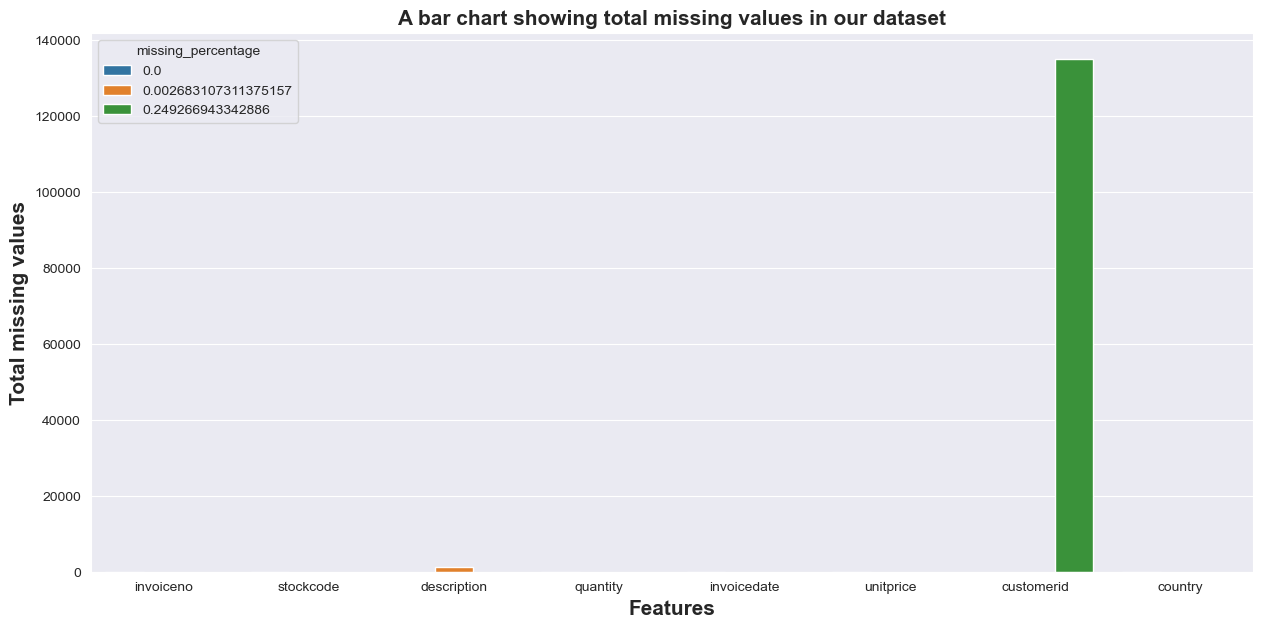

In [14]:
# Plot the missing values
missing_data1 = missing_data.reset_index()
missing_data1.columns = ['columns', 'total_missing']
missing_data1['missing_percentage'] = (missing_data1['total_missing'] / data.shape[0])
#missing_data1.reset_index()
#del missing_data1['columns']

plt.figure(figsize=(15, 7))
sns.barplot(data=missing_data1, x=missing_data1['columns'], y=missing_data1['total_missing'], hue='missing_percentage')
plt.title('A bar chart showing total missing values in our dataset', fontsize=15, fontweight='bold')
plt.ylabel('Total missing values', fontsize=15, fontweight='bold')
plt.xlabel('Features', fontsize=15, fontweight='bold')
#missing_data1['total_missing'].plot(kind='bar')
plt.show()

In total there are 136534 rows with missing entries

In [16]:
# To check if there are complete zero rows
zero_mask = data == 0
zero_mask.sum()

invoiceno         0
stockcode         0
description       0
quantity          0
invoicedate       0
unitprice      2515
customerid        0
country           0
dtype: int64

 We discover that 2515 rows in the 'unitprice' column has zero entries

In [18]:
data[data['unitprice']==0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


In [19]:
# drop all rows with missing values
data.dropna(inplace=True)
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [20]:
# Let's make sure that there are no more missing values
data.isnull().sum()


invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [21]:
#Calculate revenue generated by items on a row basis and create a new column named 'revenue'

data['revenue'] = data['quantity'] * data['unitprice']
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [22]:
# convert the 'invoicedate' column to the standard format
data['invoicedate'] = pd.to_datetime(data['invoicedate'], format="%d-%m-%Y %H:%M")

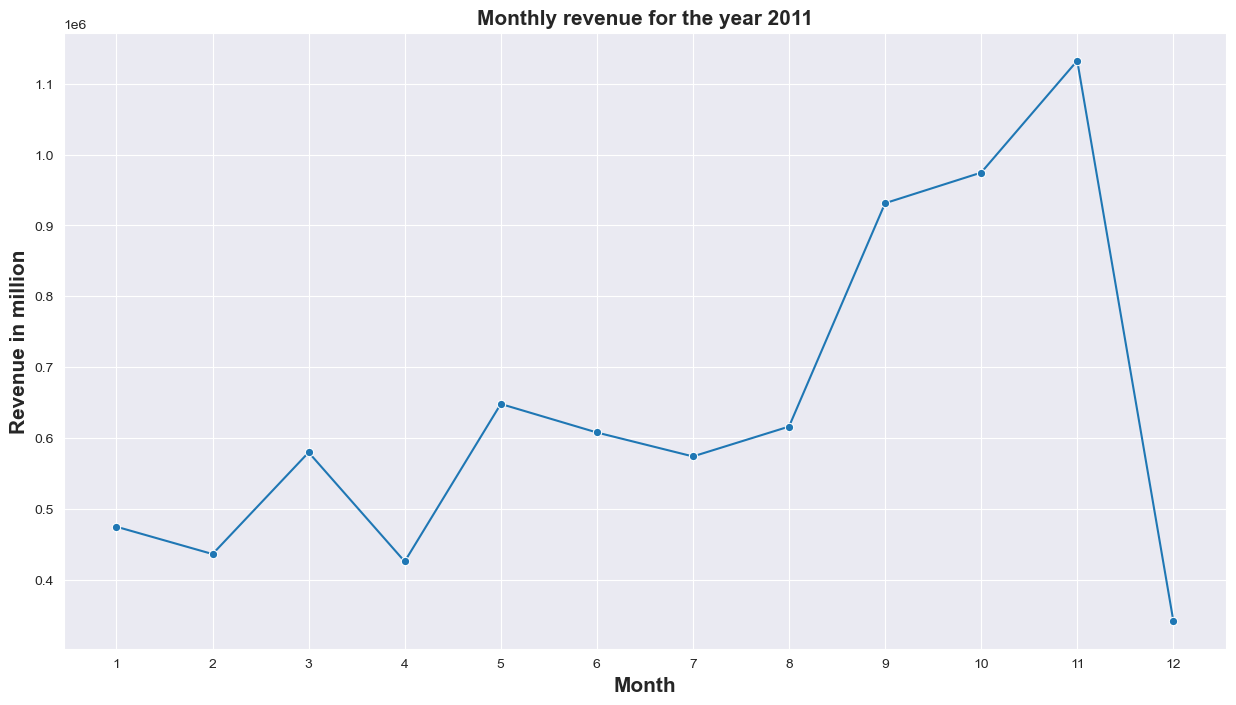

In [23]:
# Visualize monthly revenue gerated for the year 2011

retail_month = data[data['invoicedate'].dt.year==2011]

monthly_total = retail_month.groupby(retail_month['invoicedate'].dt.month).revenue.sum()
plt.figure(figsize=(15, 8))
sns.color_palette('rocket')
sns.lineplot(data=monthly_total, x=monthly_total.index, y=monthly_total.values, marker='o')
plt.xticks(range(1,13))
plt.title('Monthly revenue for the year 2011', fontsize=15, fontweight='bold')
plt.ylabel('Revenue in million', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.show()

We notice a significant rise in revenue from July to November and a steep drop between November to December.

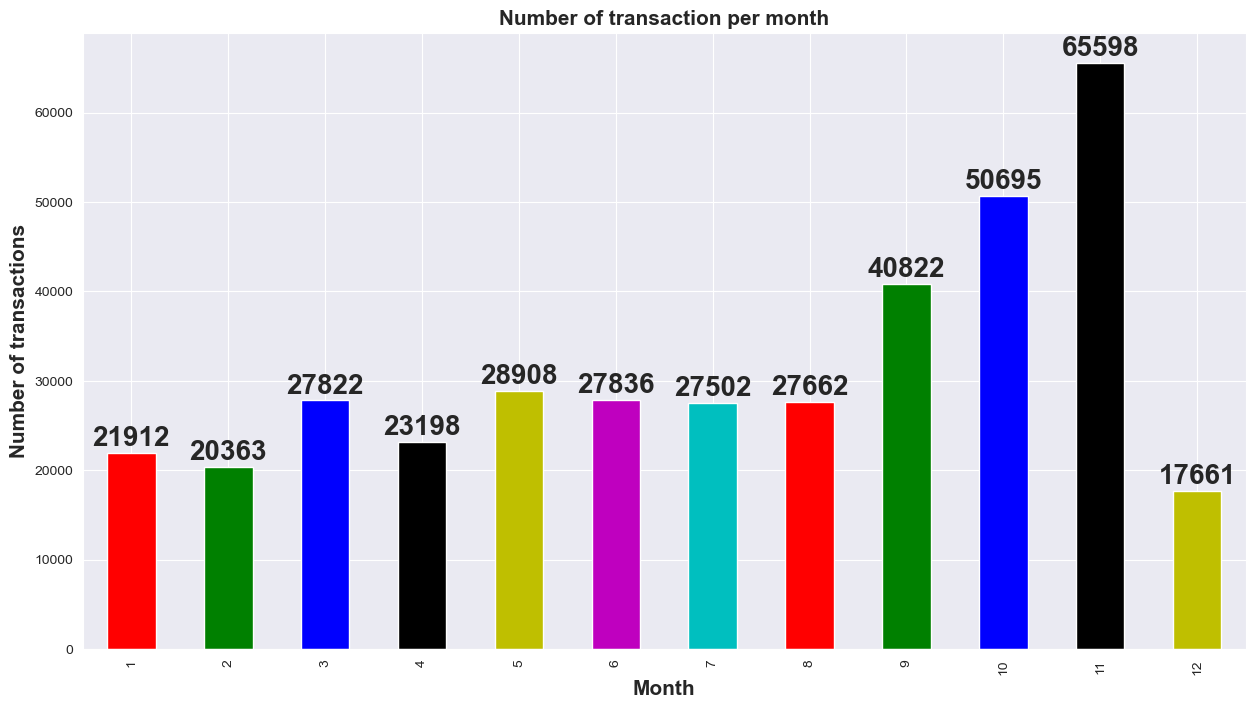

In [25]:
#Plot the amount of trasactions per month for the year 2011
fig,ax = plt.subplots(figsize=(15,8))
color=list('rgbkymc')
data[data.invoicedate.dt.year==2011].invoicedate.dt.month.value_counts(sort=False).plot(kind='bar', color=color)
plt.title("Number of transaction per month", fontsize=15, fontweight='bold')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()),
               ha='center', va='center', xytext=(0, 10),
               weight='bold', fontsize=20, textcoords='offset points')
ax.set_xlabel('Month', fontweight='bold', fontsize=15)
ax.set_ylabel('Number of transactions', fontweight='bold', fontsize=15)
    
plt.show()

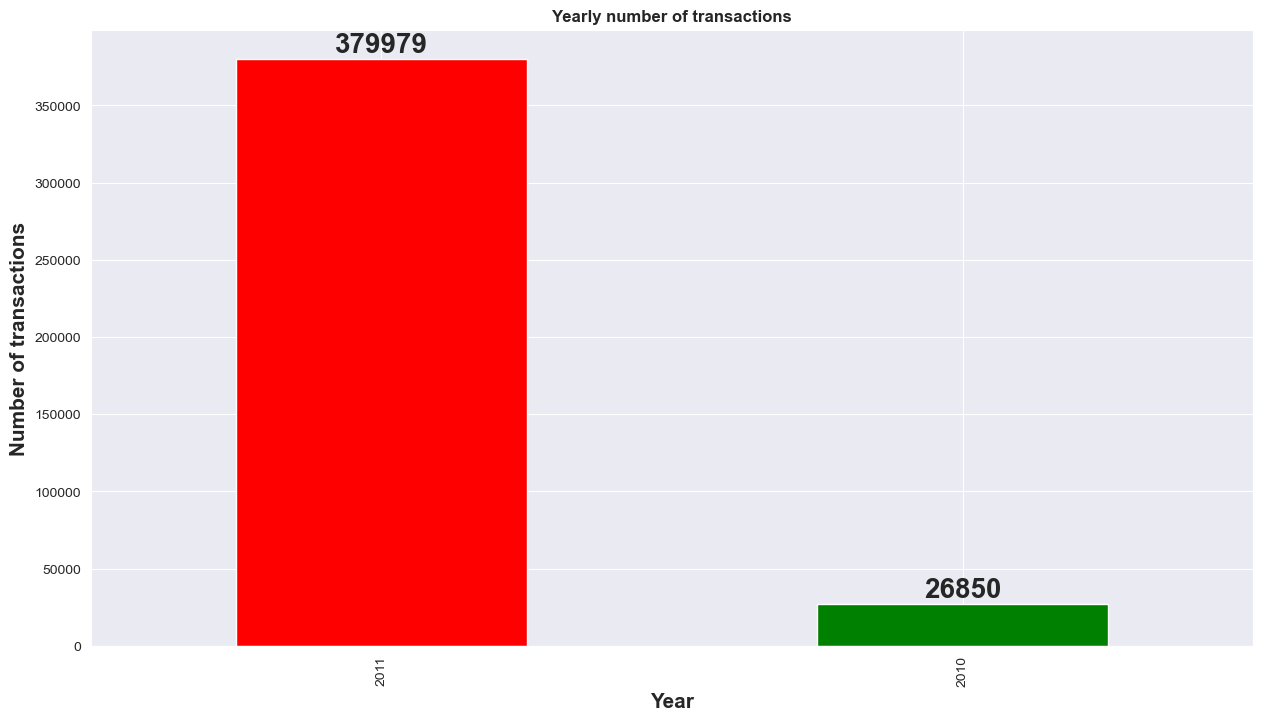

In [26]:
# Next find out the number of transactions per year
fig, ax = plt.subplots(figsize=(15, 8))
data['invoicedate'].dt.year.value_counts(sort=True).plot(kind='bar', color=color)
plt.title('Yearly number of transactions', fontweight='bold')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()),
               ha='center', va='center', xytext=(0, 10),
               weight='bold', fontsize=20, textcoords='offset points')
ax.set_xlabel('Year', fontweight='bold', fontsize=15)
ax.set_ylabel('Number of transactions', fontweight='bold', fontsize=15)
#ax.set_xticklabels(labels=['2011', '2010'], rotation=0)

plt.show()

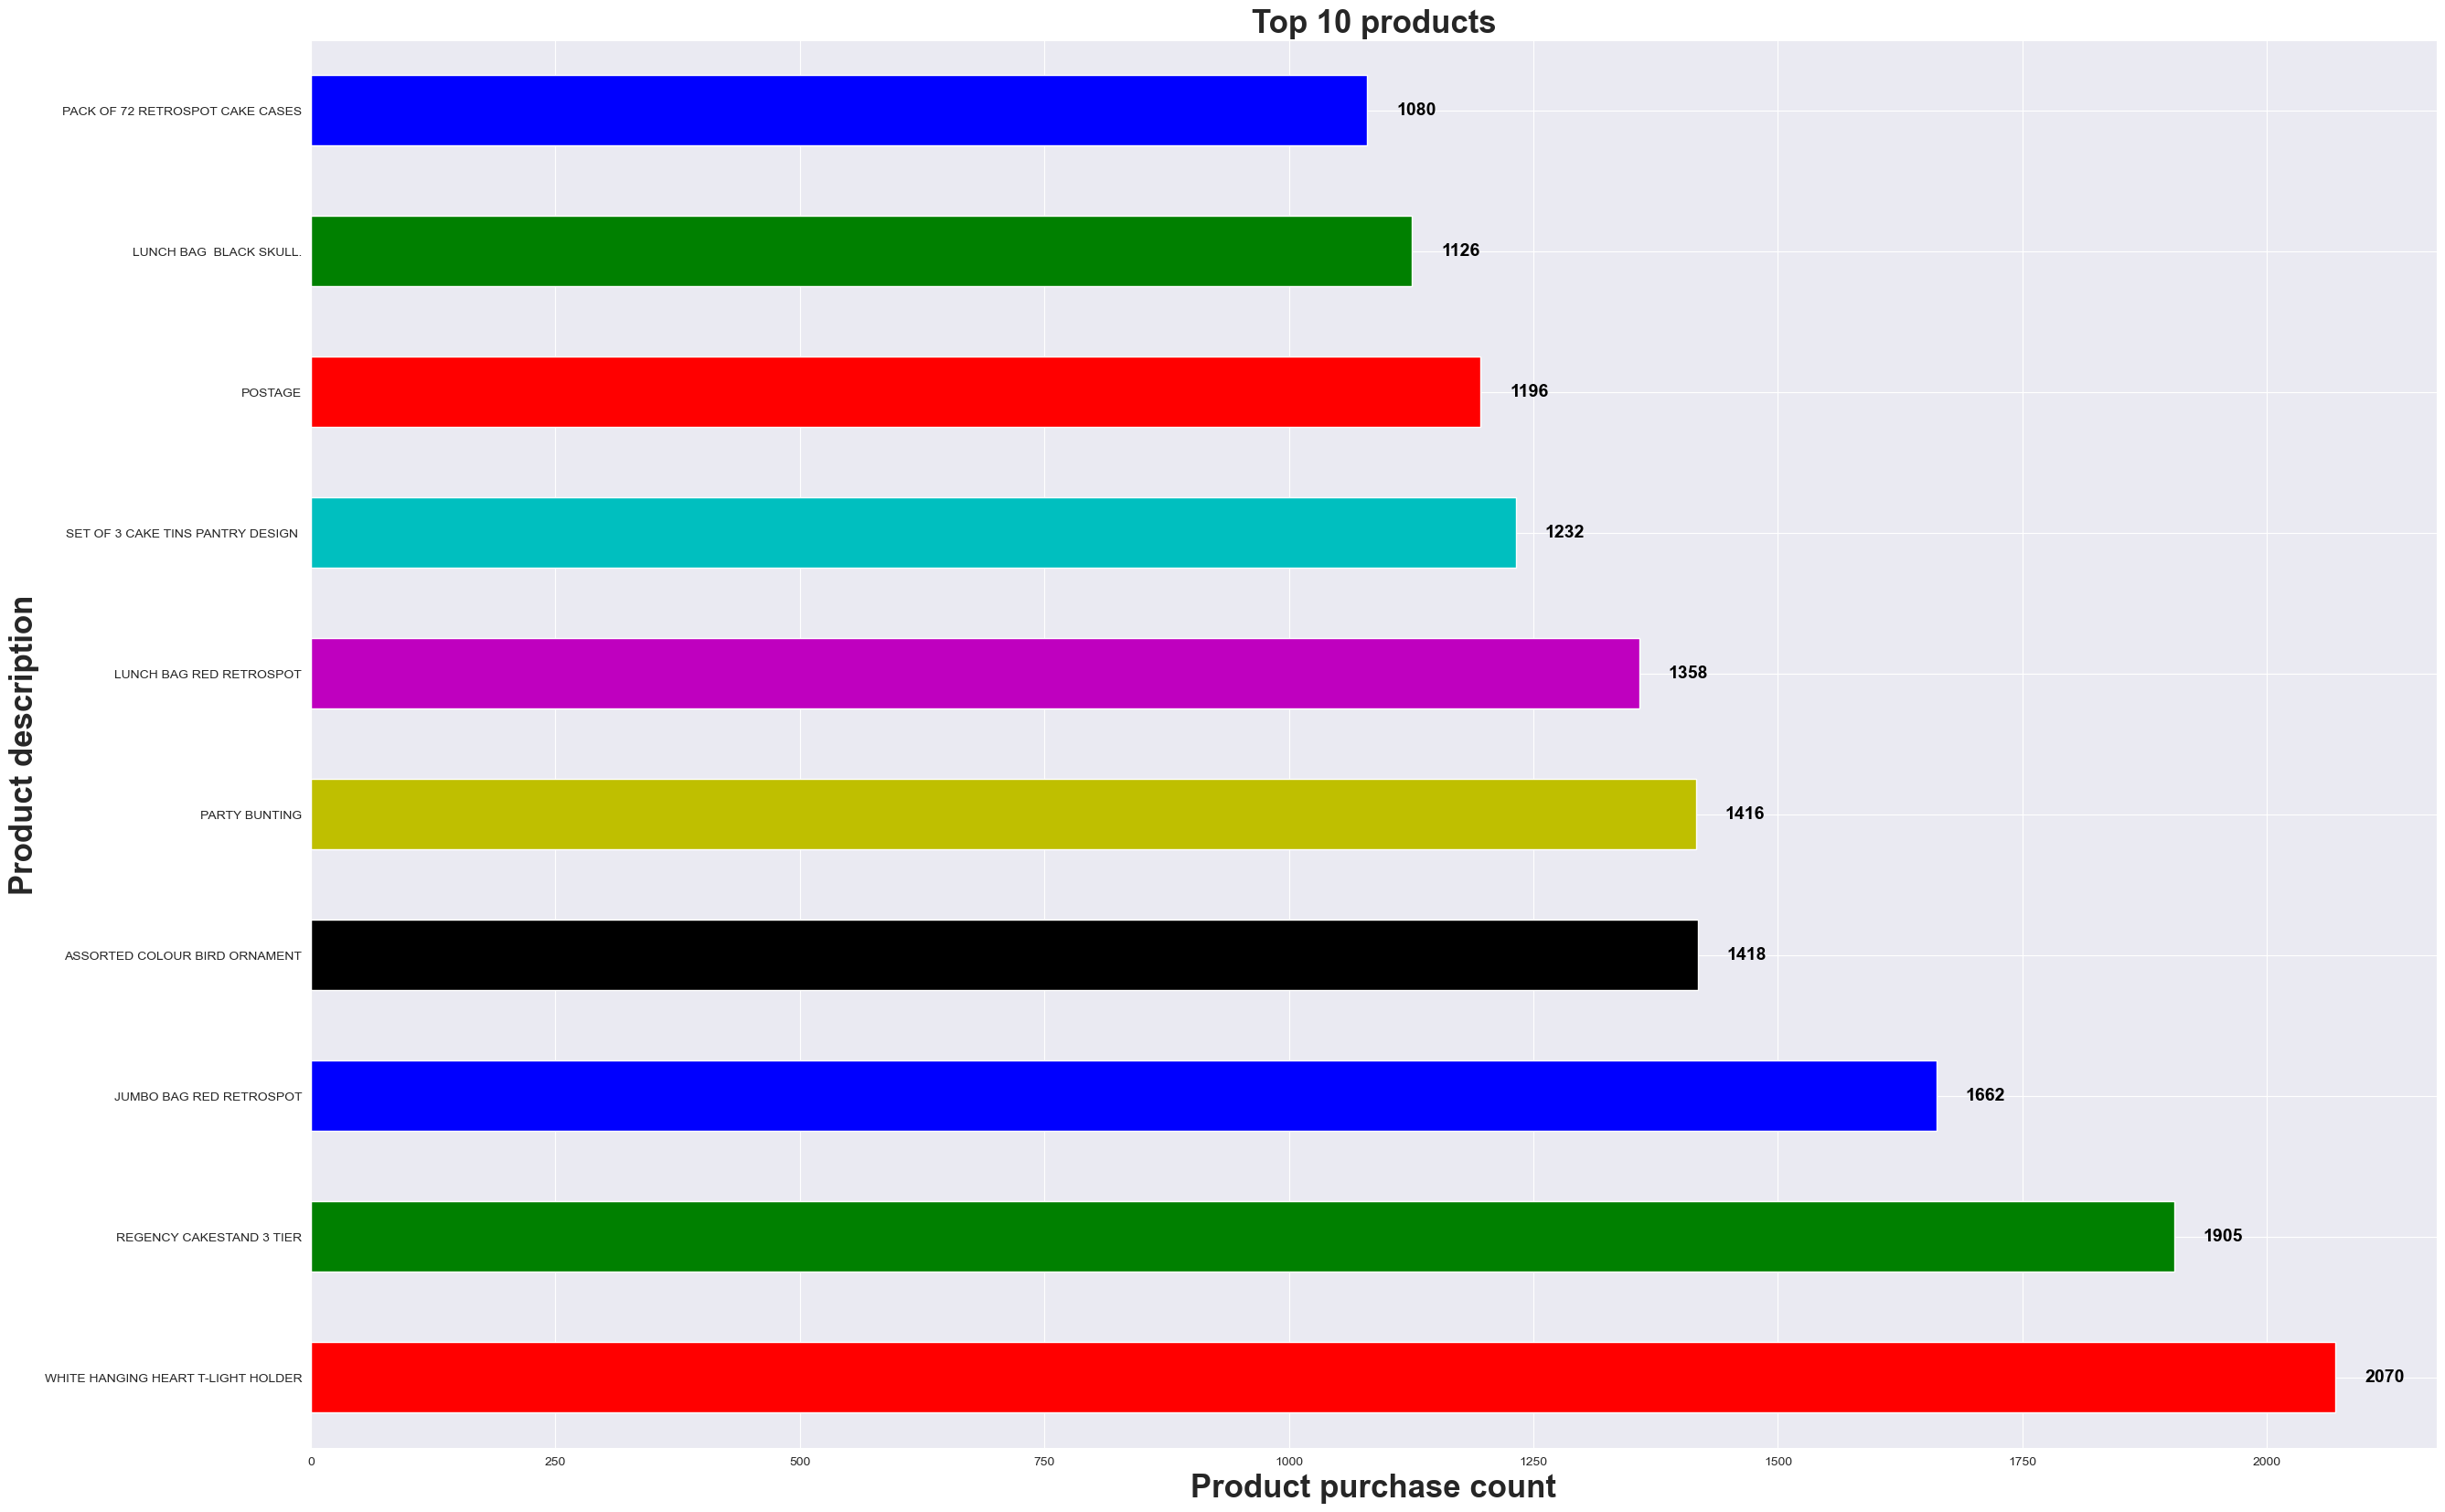

In [27]:
# What products sell the most?
color = list('rgbkymc')
top_products = data['description'].value_counts()[:10] #.reset_index()
top_products

#Let's visualize these top products
fig, ax = plt.subplots(figsize=(30, 20))
top_products.plot(kind='barh', color=color)

for i, j in enumerate(top_products):
    ax.text(j + 30, i, str(j), color='black',
           fontweight='bold', fontsize=14, ha='left',
           va='center')
    
plt.title('Top 10 products', fontsize=25, fontweight='bold')
plt.xlabel('Product purchase count', fontsize=25, fontweight='bold')
plt.ylabel('Product description', fontsize=25, fontweight='bold')
plt.show()


In [28]:
top_products = data['description'].value_counts()[:20].reset_index()
top_products

,description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
5,LUNCH BAG RED RETROSPOT,1358
6,SET OF 3 CAKE TINS PANTRY DESIGN,1232
7,POSTAGE,1196
8,LUNCH BAG BLACK SKULL.,1126
9,PACK OF 72 RETROSPOT CAKE CASES,1080


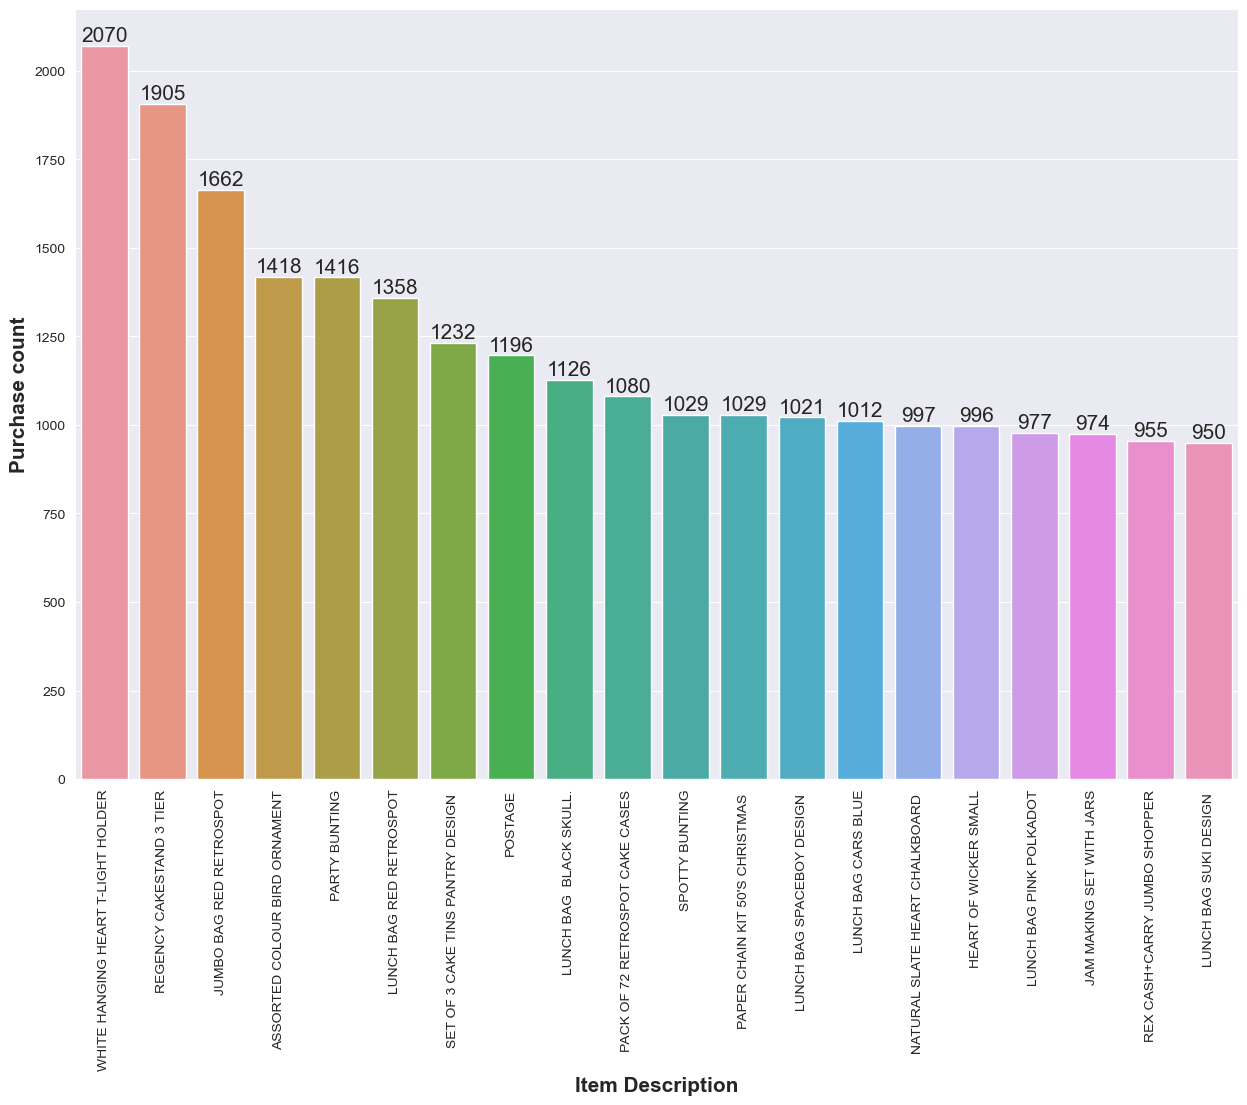

In [29]:
top_products = data['description'].value_counts()[:20].reset_index()

#fig, ax = plt.subplots(figsize=(25, 20))
plt.figure(figsize=(15,10))
sns.barplot(top_products, x=top_products['description'], y=top_products['count'])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
           height + 2, int(height),
           fontsize=15, ha='center', va='bottom')
plt.xlabel('Item Description', fontsize=15, fontweight='bold')
plt.ylabel('Purchase count',  fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Cohort Analysis

let's create invoice month column to see the customers first purchase month, then we group 
by 'customerid' and assign smallest invoice value to each customer.

In [32]:
# Create invoice month column to see custmer's first month of purchase.
data['invoicemonth'] = data['invoicedate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

# Group by 'customerid'
cust_grouping = data.groupby('customerid')['invoicemonth']

# Assign smallest invoice value to each customer

data['cohortmonth'] = cust_grouping.transform('min')

# Print the resulting data
data.iloc[:,0:11].head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicemonth,cohortmonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-12-01


In [33]:
#data.iloc[:,5:12].tail(10)

In [34]:
# Next let's define a function to extract year, month and day as integers and calculate year and month difference

def get_date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [35]:
#Invoice year and month
invoiceyear, invoice_month,_ = get_date(data, 'invoicemonth')

#cohortyear and cohort month
cohortyear, cohort_month,_ = get_date(data, 'cohortmonth')
cohort_month


0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohortmonth, Length: 406829, dtype: int32

In [36]:
# Calculating the year and month difference
yeardiff = invoiceyear - cohortyear
monthdiff = invoice_month - cohort_month

#Extracting the difference in days from all previous values
data['cohortindex'] = yeardiff * 12 + monthdiff + 1

#show result
data.iloc[:, 0:5].head()

,invoiceno,stockcode,description,quantity,invoicedate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00


In [37]:
data.iloc[:,5:13].head()

,unitprice,customerid,country,revenue,invoicemonth,cohortmonth,cohortindex
0,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [38]:
# Find monthly active customers from each cohort
grouping = data.groupby(['cohortmonth', 'cohortindex'])
cohort_data = grouping['customerid'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_count = cohort_data.pivot_table(index='cohortmonth', columns='cohortindex', values='customerid')
cohort_count

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortmonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Calculate and plot customer retention by month cohorts.
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0).round(3)*100
retention

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortmonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


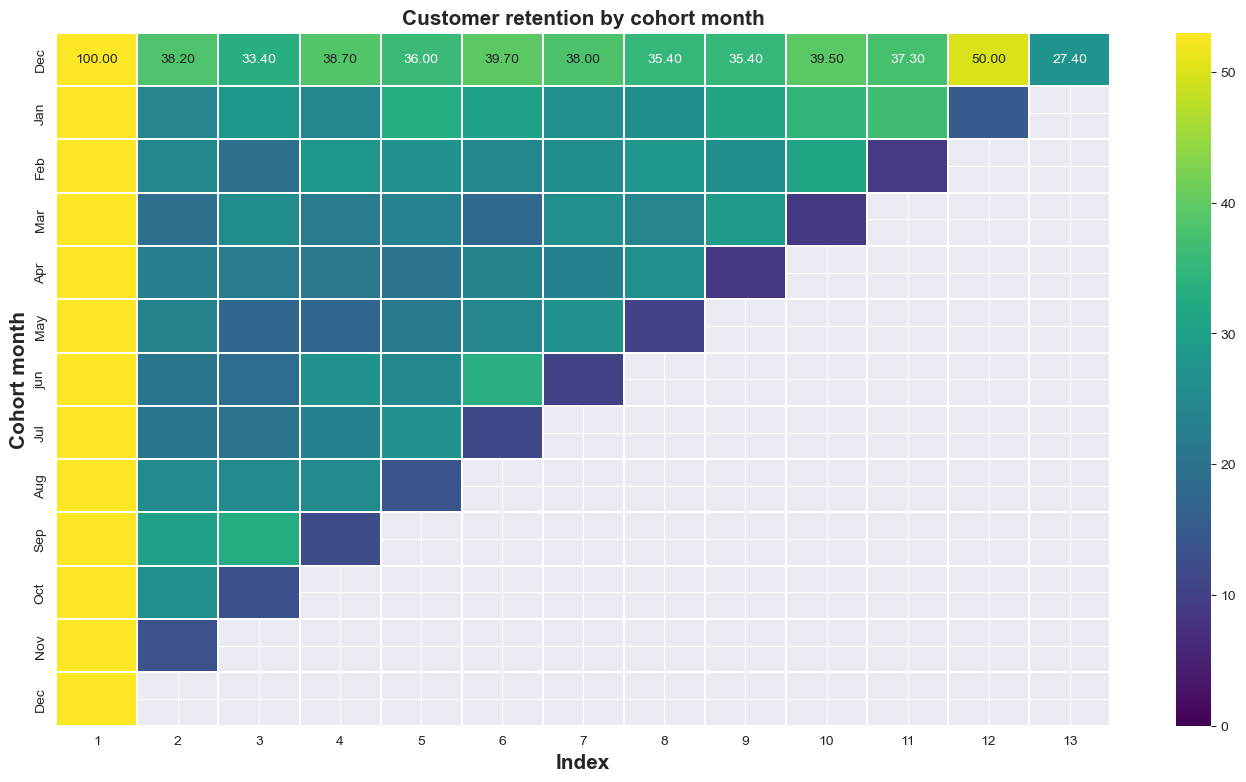

In [40]:
# Next we create a 'month_list' variable
month_list = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'jun', 'Jul', 'Aug', 'Sep', 'Oct',
             'Nov', 'Dec']

# Plotting customer retention by month cohorts

plt.figure(figsize=(17, 9))
sns.heatmap(data=retention, annot=True, cmap='viridis', vmin=0.0,
           vmax=list(retention.max().sort_values(ascending=False))[1]+3,
           fmt='.2f', linewidth=0.3, yticklabels=month_list)

plt.title('Customer retention by cohort month', fontsize=15, fontweight='bold')
plt.ylabel('Cohort month', fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontweight='bold' )

plt.show()

## Performing Recency, Frequency and Monetary analysis

This is useful in finding the targetted customers the business is looking to retain.

Here, we are trying to find how when last a customer patronized the business, how frequent the customers purchase item from the business and how much the customer spends.

In [42]:
# Find the min and max invoice date.
print('Min:{}; Max:{}'.format(min(data.invoicedate), max(data.invoicedate)))

#Monetary value will be our revenue column which we have already calculated earlier
data.iloc[:,0:15].head()

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicemonth,cohortmonth,cohortindex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


# Monetary value

In [44]:
#Calculating amount spent by customers with the period of our analysis.
amountspent = data.groupby('customerid')['revenue'].sum().reset_index()
amountspent
#Alternatively
#spent = data.groupby('customerid').agg({'revenue':sum}).reset_index()
#spent

,customerid,revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [45]:
#Let's calculate how often a customer patronizes
purchase_freq = data.groupby('customerid')['invoiceno'].count().reset_index()
purchase_freq

,customerid,invoiceno
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


# Frequency of purchase

In [47]:
# Let's merge the 'amountspent' dataframe and 'purchase_freq' dataframe on the\
#'customerid'.

mergedf = pd.merge(amountspent, purchase_freq, on='customerid', how='inner')
mergedf

,customerid,revenue,invoiceno
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


## Recency of purchase

In [49]:
# Next let's calculate customers last transaction date, difference between last date\
#and transaction date, recency per customer.

In [50]:
# calculate date of last purchase
data['invoicedate'] = pd.to_datetime(data['invoicedate'], format='%d-%m-%Y%H:%M')
maxdate = max(data['invoicedate'])

#Calculate date difference
data['datediff'] = maxdate - data['invoicedate']
data.iloc[:,0:14].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicemonth,cohortmonth,cohortindex,datediff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,373 days 04:24:00


In [51]:
# Calculate recency of purchase
lastbuy = data.groupby('customerid')['datediff'].min().reset_index()
lastbuy

,customerid,datediff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [52]:
#Extract the number of days from 'datediff'
lastbuy['daydiff'] = lastbuy['datediff'].dt.days
lastbuy.head()

,customerid,datediff,daydiff
0,12346.0,325 days 02:33:00,325
1,12347.0,1 days 20:58:00,1
2,12348.0,74 days 23:37:00,74
3,12349.0,18 days 02:59:00,18
4,12350.0,309 days 20:49:00,309


In [53]:
# Merge recency(lastbuy), merge dataframe together
rmf = pd.merge(mergedf, lastbuy, on='customerid', how='inner').drop(columns='datediff', axis=1)
rmf.columns = ['customerid', 'monetaryvalue', 'frequency', 'recency']
rmf.head()

,customerid,monetaryvalue,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [54]:
# change column order, create labels and assign them to tree percentile groups\ 
# make a new column for each group labels, and sum up the three columns

# Change columns order
cols = ['customerid', 'recency', 'frequency', 'monetaryvalue']
rmf = rmf[cols]
rmf

,customerid,recency,frequency,monetaryvalue
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88


In [113]:
#Create labels and assign them to tree percentile groups

#Recency labeling
r_labels = range(4, 0, -1)

#Recency grouping
r_group = pd.qcut(rmf.recency, q=4, labels=r_labels)

# Frequency grouping
f_labels = range(1, 5)

#Frequency grouping
f_group = pd.qcut(rmf.frequency, q=4, labels=f_labels)

# Monetaryvalue labeling
mv_labels = range(1, 5)

# Monetaryvalue grouping
mv_group = pd.qcut(rmf.monetaryvalue, q=4, labels=mv_labels)


# Make a new column for each group labels
rmf['R'] = r_group.values #for recency

rmf['M'] = mv_group.values # for monetary value group

rmf['F'] = f_group.values # for frequency group


# Add up the three groups into a single column as 'RMF_ALL'
rmf['rmf_all'] = rmf.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
rmf['rmfscore'] = rmf[['R', 'F', 'M']].sum(axis=1)
rmf


,customerid,recency,frequency,monetaryvalue,R,M,F,rmf_all,rmfscore,rmflevel,segment
0,12346.0,325,2,0.00,1,1,1,111,3,green,others
1,12347.0,1,182,4310.00,4,4,4,444,12,gold,others
2,12348.0,74,31,1797.24,2,4,2,224,8,silver,others
3,12349.0,18,73,1757.55,3,4,3,334,10,silver,others
4,12350.0,309,17,334.40,1,2,1,112,4,green,others
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3,green,others
4368,18281.0,180,7,80.82,1,1,1,111,3,green,others
4369,18282.0,7,13,176.60,4,1,1,411,6,bronze,others
4370,18283.0,3,756,2094.88,4,4,4,444,12,gold,others


In [115]:
# Next assign labels from total score
score_label = ['green', 'bronze', 'silver', 'gold']
score_group = pd.qcut(rmf.rmfscore, q=4, labels=score_label)
rmf['rmflevel'] = score_group.values
rmf.sort_values(by='rmfscore', ascending=False)
rmf.head()

,customerid,recency,frequency,monetaryvalue,R,M,F,rmf_all,rmfscore,rmflevel,segment
0,12346.0,325,2,0.00,1,1,1,111,3,green,others
1,12347.0,1,182,4310.00,4,4,4,444,12,gold,others
2,12348.0,74,31,1797.24,2,4,2,224,8,silver,others
3,12349.0,18,73,1757.55,3,4,3,334,10,silver,others
4,12350.0,309,17,334.40,1,2,1,112,4,green,others


In [117]:
rmflevel_df = rmf.groupby('rmflevel')['customerid'].count().reset_index(name='count')
rmflevel_df

,rmflevel,count
0,green,1300
1,bronze,915
2,silver,1318
3,gold,839


In [244]:
# Next, we define a 'plot_piechart()' function to display the rmflevels.

def plot_piechart(data, var):
    plt.figure(figsize=(17,10))
    label_list = data[var].value_counts().index
    data[var].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('prism',7),
                                     startangle=60, labels=label_list, wedgeprops={'linewidth':2,
                                                                                  'edgecolor':'k'},
                                     shadow=True, textprops={'fontsize':17})
    plt.title("Distribution of " + var + " variable", fontsize=17, fontweight='bold')

def plot_bar(data, var):
    plt.figure(figsize=(17, 8))
    ax = data[var].value_counts().plot(kind='barh')
    plt.title('Count of '+var+ ' cases', fontweight='bold', fontsize=17)
    plt.xlabel('Count', fontweight='bold', fontsize=15)
    #plt.ylabel('RMF level', fontweight='bold', fontsize=15)
    plt.show()

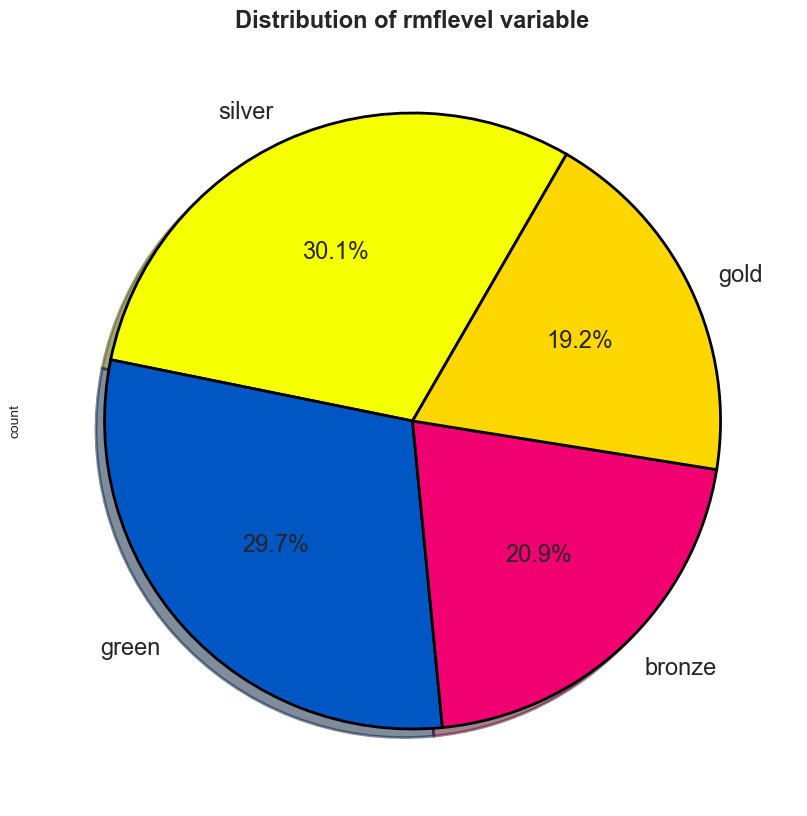

In [246]:
plot_piechart(rmf, 'rmflevel')

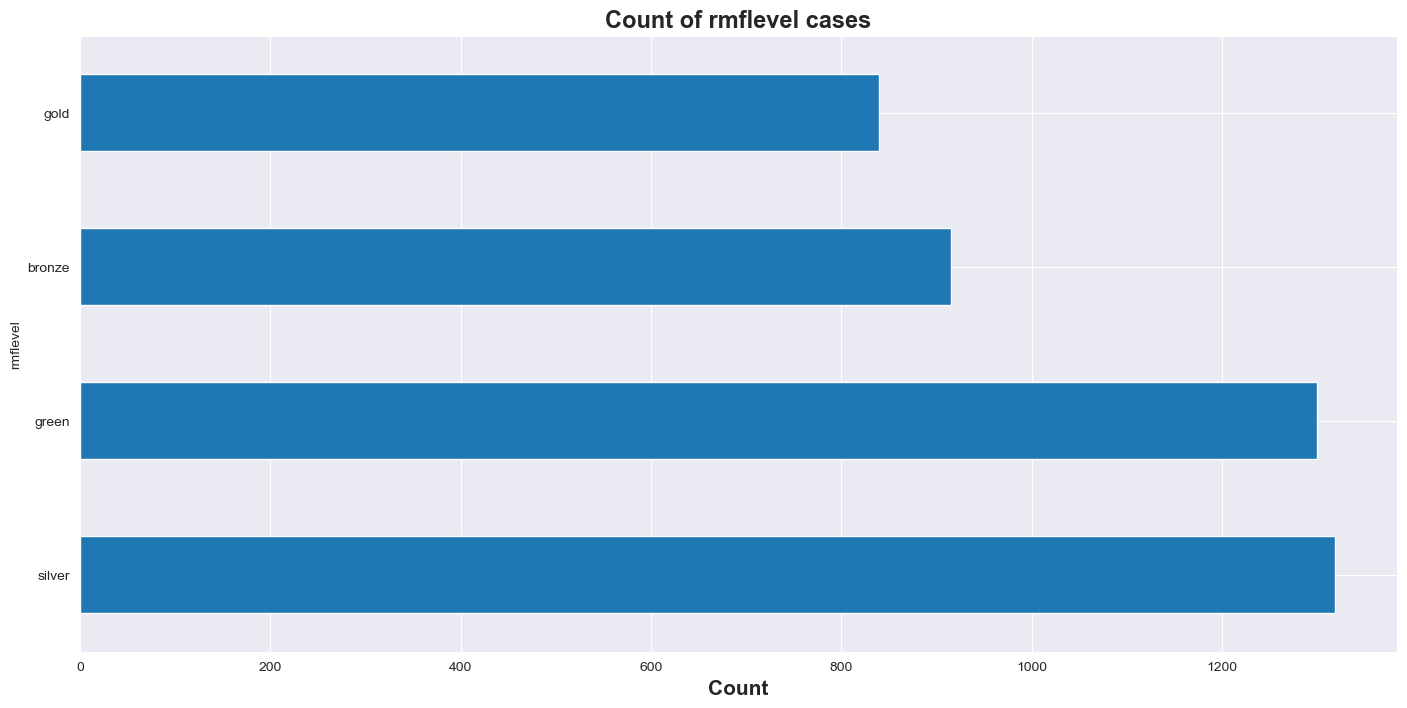

In [248]:
plot_bar(rmf, 'rmflevel')

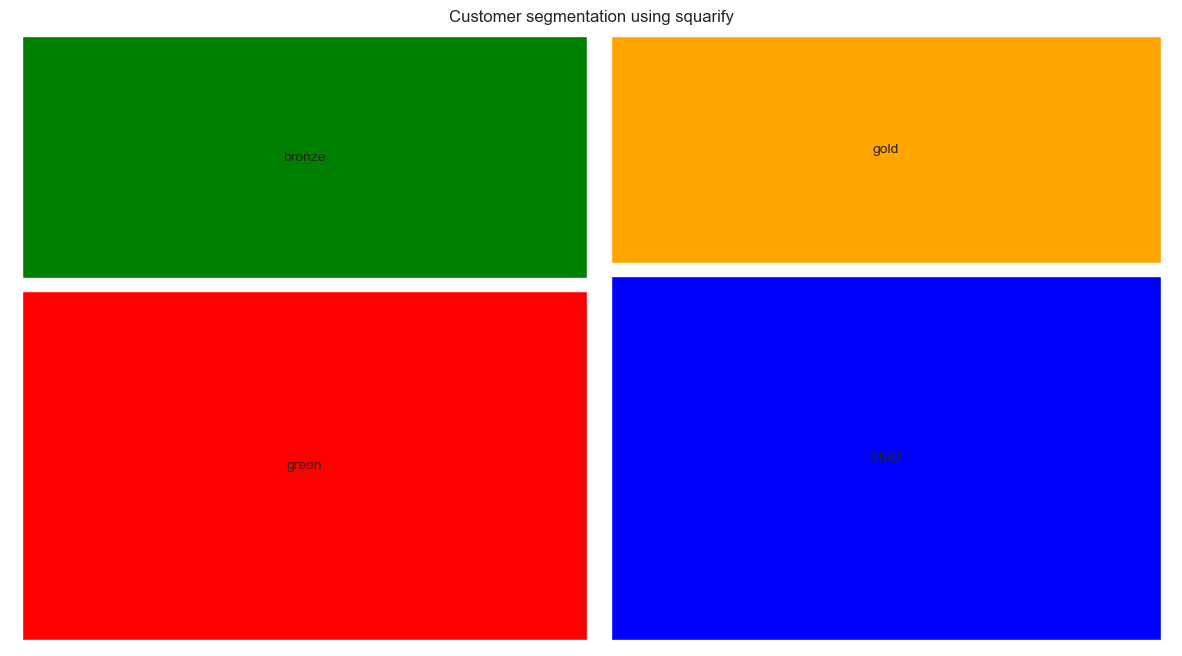

In [250]:
#Lets's try using squarify to view the rmf levels
import squarify

levels = rmflevel_df['rmflevel']
score = rmflevel_df['count']
plt.figure(figsize=(15,8))
plt.title('Customer segmentation using squarify')
color = ['red', 'green', 'blue', 'orange']
squarify.plot(sizes=score, label=levels, color=color, pad=True)
plt.axis('off')
plt.show()

Lets perform more detailed segmentation, we weill swap the key and value of dictionary, allocate segments to each customer with respect to the RFM score mapping and allocate the remaining customers to other segments.

In [253]:
segment_dict = {'best customers':'444', #customers with highest frequency, monetary value and least recency
               'loyal customers':'344', #customers with high frequency with good monetary value and good recency
               'potential loyalist':'434', # customers with high recency and monetary value, average frequency
               'big spenders':'334', # customers with high monetary value and good recency and frequency value
               'at risk customers':'244', #customers who shop less often now but used to shop a lot
               'gone passive':'144', # customers who shopped long ago but used to shop a lot
               'recent customers':'443', # customers who recently started shopping a lot but with less monetary value
               'long shopped low spenders':'122', # customers who shopped long ago but with less frequency and monetary value
               }

#swap the key and value of dictionary
dict_swap = dict(zip(segment_dict.values(), segment_dict.keys()))

# allocate segments to each customer with respect to the rmf score mapping

rmf['segment'] = rmf.rmf_all.map(dict_swap)

# Next,  we allocate all the remaining customers to others segment category
rmf.segment.fillna('others', inplace=True)

rmf

,customerid,recency,frequency,monetaryvalue,R,M,F,rmf_all,rmfscore,rmflevel,segment
0,12346.0,325,2,0.00,1,1,1,111,3,green,others
1,12347.0,1,182,4310.00,4,4,4,444,12,gold,best customers
2,12348.0,74,31,1797.24,2,4,2,224,8,silver,others
3,12349.0,18,73,1757.55,3,4,3,334,10,silver,big spenders
4,12350.0,309,17,334.40,1,2,1,112,4,green,others
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3,green,others
4368,18281.0,180,7,80.82,1,1,1,111,3,green,others
4369,18282.0,7,13,176.60,4,1,1,411,6,bronze,others
4370,18283.0,3,756,2094.88,4,4,4,444,12,gold,best customers


In [255]:
# Let's now create a dataframe for segmented rfm
segment_df = rmf[rmf['segment'] != 'others'].groupby('segment')['customerid'].count().reset_index(name='count')
segment_df

,segment,count
0,at risk customers,103
1,best customers,471
2,big spenders,59
3,gone passive,20
4,long shopped low spenders,209
5,loyal customers,206
6,potential loyalist,79
7,recent customers,83


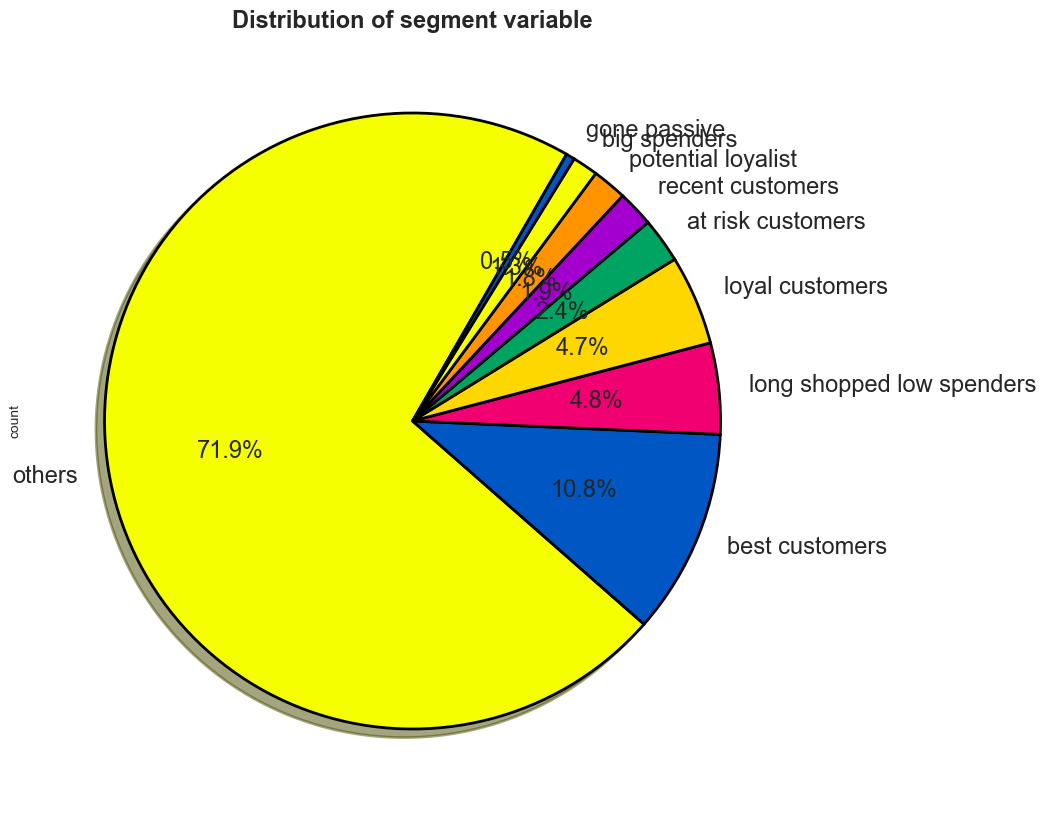

In [257]:
# Let's visualize the segmentation with the aid of a pi chart and bar chart.

plot_piechart(rmf, 'segment')

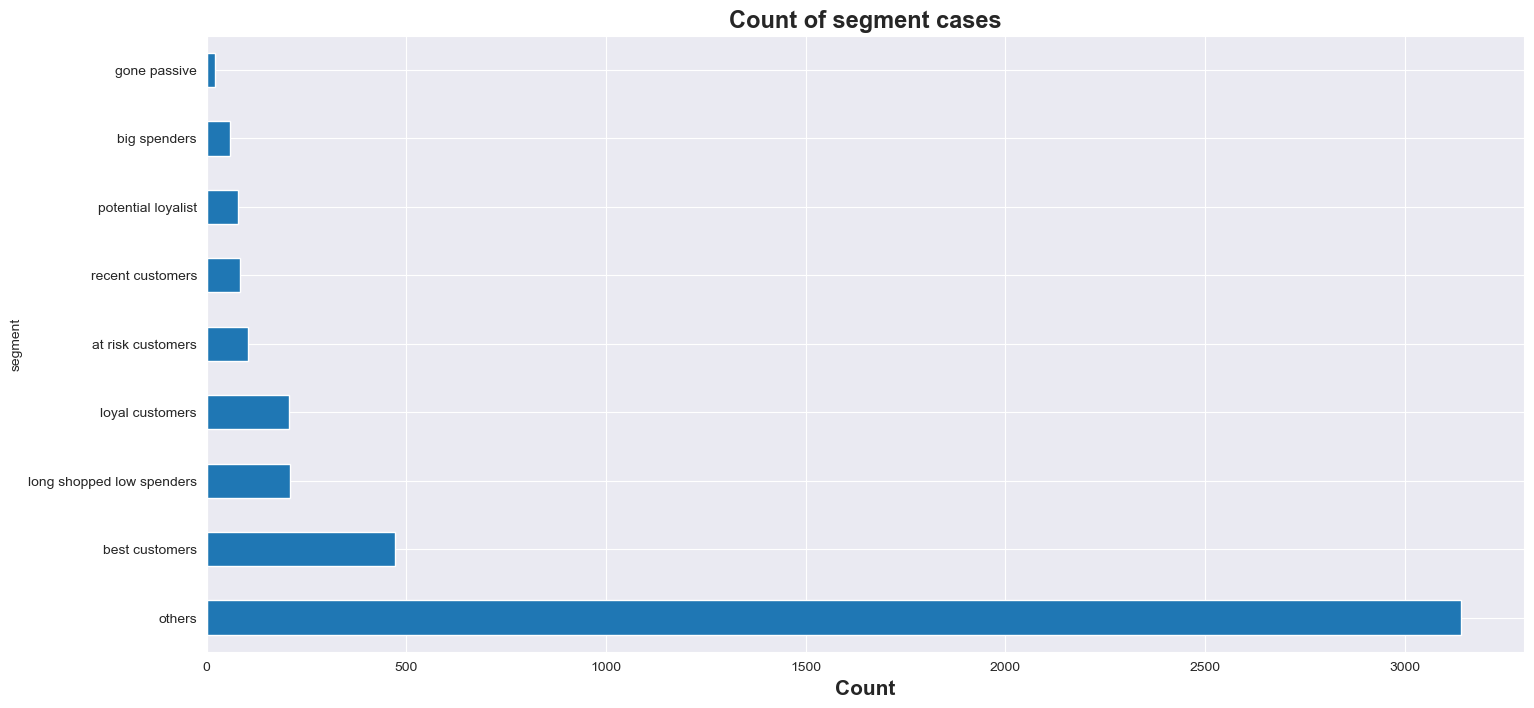

In [259]:
plot_bar(rmf, 'segment')

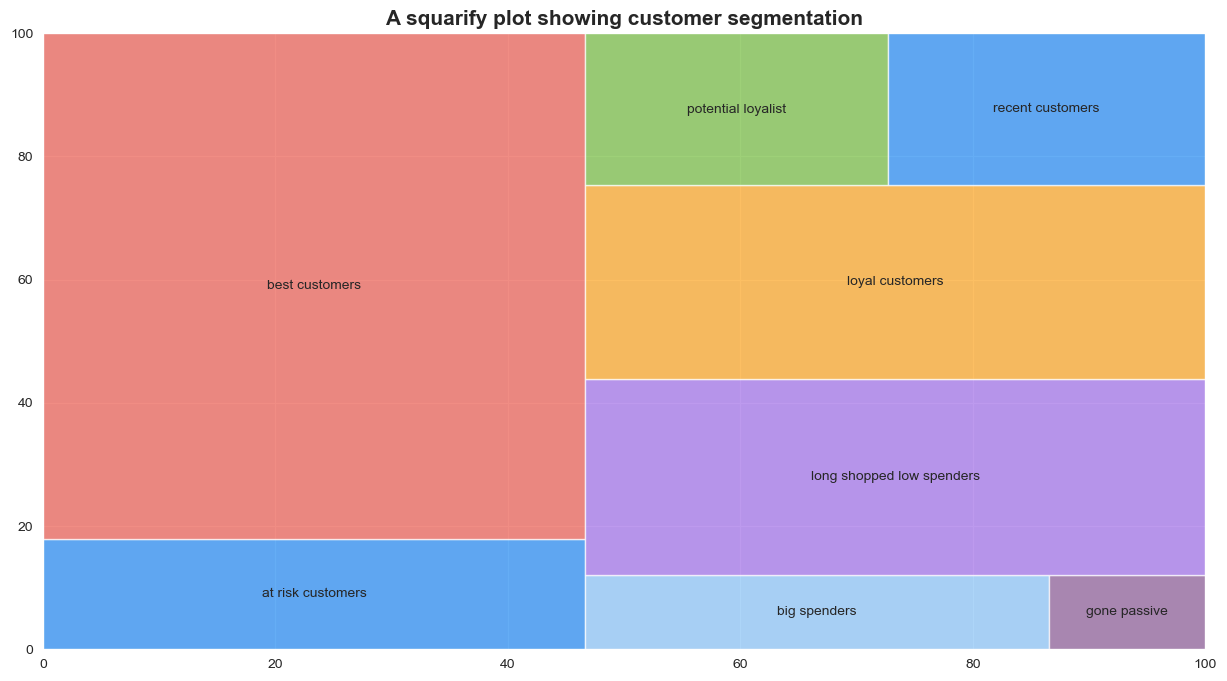

In [269]:
# Exclude others from the segmentation
segment = segment_df['segment'].iloc[:8]
score = segment_df['count'].iloc[:8]
color_list = ['#248af1', '#eb5d50', '#8bc4f6', '#8c5c94', '#a170e8', '#fba521', '#75bc3f']
plt.figure(figsize=(15,8))
plt.title('A squarify plot showing customer segmentation', fontsize=15, fontweight='bold')
squarify.plot(sizes=score, label=segment, color=color_list, alpha=0.7)
plt.show()

## Conclusion:
We have successfully used cohort analysis to determine various behaviours of customers in the dataset.

This will enable the business to know which customers to target in order to maximize their revenue.


# Up next: K-means clustering. stay tuned